In [25]:
# Generate data points

#a. Establish a linear regression model to predict y data.

#b. Establish a polynomial model with highest power of 2 to predict y data.

#c. Establish a three-layer (including input, 1 hidden (6 nodes) and output layer) neural network to predict y data. 

#d. Calculate and compare mean squared errors of three models in (a), (b) and (c).

#e. Plot data points and curve of predictions in (a) and (b).

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline 

In [3]:
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

In [4]:
# a
# Building Model
lr = linear_model.LinearRegression()

# Training Model
lr.fit(x_data.reshape(-1,1),y_data.reshape(-1,1))

LinearRegression()

In [5]:
#Predicting phase
yhat=lr.predict(x_data.reshape(-1,1))

In [6]:
# d- for linear regression model (a)
print('Mean Squared Error:', mean_squared_error(y_data,yhat))

Mean Squared Error: 0.005961980133794211


In [7]:
# b 
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_data.reshape(-1,1),y_data.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [8]:
poly_hat=pipe.predict(x_data.reshape(-1,1))

In [9]:
# d- for polynomial model (b)
print('Mean Squared Error:', mean_squared_error(y_data,poly_hat))

Mean Squared Error: 0.00039102911736128447


In [10]:
#!pip3 install keras==2.3.1

In [11]:
#!pip3 install git+https://www.github.com/keras-team/keras-contrib.git

In [12]:
#!pip3 install --upgrade --user tensorflow
#!pip3 install --upgrade --user tensorflow-gpu

In [13]:
# c - building three-layer neural network with keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(1, input_dim=1, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(6, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='lecun_normal', activation='linear'))

Using TensorFlow backend.


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=0)
print('number of test samples:', x_test.shape[0])
print('number of training samples:', x_train.shape[0])

number of test samples: 40
number of training samples: 160


In [15]:
from keras import optimizers
import tensorflow as tf
tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [16]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
160/160 [==============================] - 0s 873us/step - loss: 0.0105
Epoch 2/150
160/160 [==============================] - 0s 156us/step - loss: 0.0073
Epoch 3/150
160/160 [==============================] - 0s 191us/step - loss: 0.0061
Epoch 4/150
160/160 [==============================] - 0s 170us/step - loss: 0.0059
Epoch 5/150
160/160 [==============================] - 0s 169us/step - loss: 0.0059
Epoch 6/150
160/160 [==============================] - 0s 175us/step - loss: 0.0059
Epoch 7/150
160/160 [==============================] - 0s 185us/step - loss: 0.0059
Epoch 8/150
160/160 [==============================] - 0s 181us/step - loss: 0.0059
Epoch 9/150
160/160 [==============================] - 0s 163us/step - loss: 0.0059
Epoch 10/150
160/160 [==============================] - 0s 163us/step - loss: 0.0059
Epoch 11/150
160/160 [==============================] - 0s 181us/step - loss: 0.0059
Epoch 12/150
160/160 [==============================] - 0s 188us/step - lo

In [17]:
# predicting
y_pred = model.predict(x_test)
print (y_pred[0:5])

[[0.07934193]
 [0.08067493]
 [0.08012244]
 [0.08004351]
 [0.08073632]]


In [22]:
# d for neural network (c)
mse = tf.keras.losses.MeanSquaredError()
mse(y_test, y_pred).numpy()

0.006407729

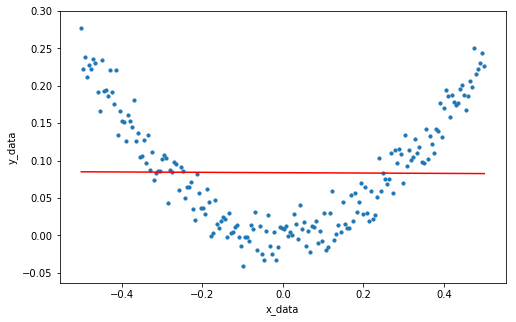

In [23]:
# e
# plotting LR
plt.figure(figsize=(8,5))
plt.scatter(x_data,y_data,s=10)
plt.plot(x_data,yhat,color='r')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.show()

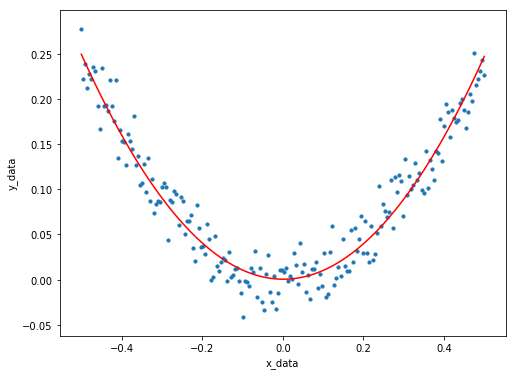

In [24]:
#plotting polynomial model

plt.figure(figsize=(8,6))
plt.scatter(x_data,y_data,s=10)
plt.plot(x_data,poly_hat,color='r')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.show()

### Comparing the results- MSE for three different models

| Models | MSE |
| --- | --- |
| Linear Regression | 0.005961980133794211 |
| Polynomial | 0.00039102911736128447 |
| 3-layer Neural Network | 0.006407729 |

#### Baswed on above table, Polynomial model has the lowest MSE and we know that the lowest MSE, the better prediction